# Cian Hogan
## Machine Learning and Statistics Module
## GMIT Data Analytics
### Final Assessment

<img src="https://docs.scipy.org/doc/scipy/_static/scipyshiny_small.png" alt="Scikit-Learn Logo" align="left" border=0/>  


# SciPy.stats

# Introduction

SciPy is a third-party python library for scientific computing. It is based on the numpy package and provides a collection of mathematical algorithms and conveniece functions for advanced statistical analysis. The package provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and more.(scipy.org, 2021)

Below are a list of all available modules within the SciPy ecosystem:
- Special functions (scipy.special)
- Integration (scipy.integrate)
- Optimization (scipy.optimize)
- Interpolation (scipy.interpolate)
- Fourier Transforms (scipy.fft)
- Signal Processing (scipy.signal)
- Linear Algebra (scipy.linalg)
- Sparse eigenvalue problems with ARPACK
- Compressed Sparse Graph Routines (scipy.sparse.csgraph)
- Spatial data structures and algorithms (scipy.spatial)
- Statistics (scipy.stats)
- Multidimensional image processing (scipy.ndimage)
- File IO (scipy.io)

This project will focus on the statistics package, **scipy.stats**, contained within the scipy library and examine how the package can be used to conduct hypothesis testing in the form of ANOVA.
***

# SciPy Stats

The scipy.stats module contains a vast array of array of statistical functions that provide access to probability distributions, summary and frequency statistics, kernal density estimates, correlation functions and statistical tests and  more.

The python package Numpy, for numerical computing, offers a number of statistical functions for quick calculations, such as mean, median, standard deviation ect. The scipy stats module exapnds on this fucntionality allowing the use of more advanced statistical functions, probability distributions and other statistical methods.(Bressert, E, 2013)


The scipy.stats provides functions for over 100 probability distributions, dozens of statistical functions and statistical tests. Each of these could be examined in great detail. For the purposes of this report, we will look specifically at performing an ANOVA anylsis using the methods provided within scipy.stats.
***

# Anova

ANOVA (Analysis of variance) is a statistical technique for examining the differences between the means of two or more populations. In general Anova is reserved for 3 or more populations as a t-test can be performed for 2 groups.

Typically the null hypothesis assumes that all group means are equal, and the alternative hypothesis is that the means are significantly different. For the null hypothesis to be rejected, the ANOVA must shows that there is sufficient evidence to support that the means are not the same.

An ANOVA must have a continous (metric) dependent variable, and two or more categorical (non-metric) independent variables. For example, house prices could be our dependent variable, a house has a distinct price in euros, and our indoendent variables could be province of purchase (Munster, Leinster, Connacht, Ulster). The indedepent variable is also called the factor. 

The simplest form of ANOVA is a one-way ANOVA where there is only one categorical variable to consider. If more than one factors are used, it requires an n-way ANOVA analysis. For the purposes of our analysis we will only consider a One-way ANOVA. (Malhorta,N & Birks,D, 2006)
***

# One-Way ANOVA
One-way ANOVA examines the difference of the mean values of a dependent variable, for several categories of a single independent variable.

The null hypothesis is that the means for each group (different independent variable) are the same. If the null hypothesis is not rejected then the independent variable can be said to not have significant effect on the dependent (metric) variable.

If the null hypothesis is rejected and the alternative accepted, then the independent variable does have a significant effect on the dependent variable. To analyse whether we can reject the null hypothesis we use ANOVA to calculate the F-statistic and P value of the data, and if the F-statistic exceeds the critical value based of the F-distribution, we can reject the null hypothesis that the means are the same. (Malhorta,N & Birks,D, 2006)
***

## Assumptions

Before we complete our AVONA analysis, we must first make sure our data meets the criteria to be used with ANOVA. To do this this we must make sure the data meets the below assumptions.

1. The dependent variable must be continuous, ie it should be a metric value.

2. The independent variable must consist of 3 or more categorical values. In general ANOVA is reserverd for 3 or more groups or categories.

3. There should be independence of observations, meaning that there should be no cross-over between the groups. This is most appllicable in the study design stage but important to remember when assessing if ANOVA is an appropriate statistical test.

4. There should be no significant outliers, outliers can have a large negative effect on the perfromance of the ANOVA analysis. 

5. The dependent variable for each category should follow an approximate normal distribution. It is possible to test for normality using the the Shapiro-Wilk test of normality.

6. There should be homogeneity of variances between the category samples. This means that the samples should show a similar spread of values from the means. (statistics.laerd.com, 2018)


## F statistic

The F-Statistic is a ratio of the Between-category variation and the Within-category variation, listed below as SSx and SSerror respectively.

SSx or Between-category variation is calculated as, the sum of each of the category means minus the overall mean of the total sample squared, multiplied by the number of samples in the category, written as:

$SSx =\sum_{}$n(category mean - sample mean)$^2$

SSerror or within-category variation is calculated as, the sum of each value, minus it's own category mean and squared, written as:

$SSerror =\sum_{}$(each individual value - category mean)$^2$

To calculate the F statistic we take our SSx and SSerror and perform a finals calculation to determine the F-ratio or F statistic. Calculating the F statistic requires the use of 2 more variables, the degrees of freedom numerator (dfn) and the degrees of freedom denominator (dfd). The dfn is defined as the number of categories minus 1. the dfd is defined as the number of samples minus the number of categories. In our example below we have 3 categories and 30 total samples so our dfn is 2 and our dfd is 27.

The F statistic is equal to SSx divided by the dfn over the SSerror divided by the dfd, written as:

$ SSx | dfn \over SSerror | dfd $

(Malhorta,N & Birks,D, 2006)
***

## Manual ANOVA

Now that we have shown above how the ANOVA can be completed, we can use python to manually calculate our F statistic.

To start we import a number of packages which will be used throughout the report. Using Numpy's random module we can create 3 random groups of data, a, b and c. Each group has 10 values, ranging between 0 and 10. For easier calculations we also create a list of our entire sample, called totalSample and calculate the mean of the sample, **4.13**.

In [112]:
import pandas as pd
from scipy import stats
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=49)

a = rng.integers(low=0, high=10, size=10)
b = rng.integers(low=0, high=10, size=10)
c = rng.integers(low=0, high=10, size=10)

totalSample = []

for i in [a,b,c]:
    for j in i:
        totalSample.append(j)
        
sampleMean = sum(totalSample)/len(totalSample)
sampleMean

4.133333333333334

Next we can calculate the value for SSx. Here we loop through each category and calculate the mean of each category, take the overall sample mean away, square our result and multiple by the number of samples in the given category. This gives us a total SSx of **6.066**.

In [113]:
SSx = 0

for i in [a,b,c]:
    catMean = (sum(i)/len(i))
    SSx += len(i)*((catMean-sampleMean)**2)
    
SSx

6.066666666666668

Now that we have our SSx value, we need our SSerror to be able to find our F statistic. To calculate SSerror, we loop through a list of categories and use a second loop to loop through each value within those categories. We take the category mean from the value and square the result adding the squared result to our sum variable SSerror. Our total for SSerror is **269.4**

In [115]:
SSerror = 0

for i in [a,b,c]:
    for j in i:
        catMean = (sum(i)/len(i))
        SSerror += (j-catMean)**2
        
SSerror

269.4

We can check our work by fidning the total variation within the sample. The total variation is denoted as SSy and should be equal to SSx + SSerror. SSy is calculated as the Sum of the square of each value in the sample minus the total sample mean. In our case the result is **275.47** which is the same as SSx + SSerror.

$ SSy = SSx + SSerror $

In [117]:
SSy = 0
for i in totalSample:
    SSy += (i-sampleMean)**2
    
print(f"Total Variation: {round(SSy,2)}, Between Category + Within Category Variation {round(SSerror+SSx,2)}")

Total Variation: 275.47, Between Category + Within Category Variation 275.47


Now that we have calculated our SSx and SSerror, and verified our results are equal to SSy, we can calculate our F statistic.

First we set our dfn and dfd variables for our degrees of freedom. Then we calculate our F statistic as: $ SSx | dfn \over SSerror | dfd $ which equates to **0.3040** 

In [121]:
dfn, dfd = (3-1), ((len(group)-3)) 

F_stat = (SSx/dfn)/(SSerror/dfd)

print(f"F statistic for the groups a,b,c: {round(F_stat,4)}")

F statistic for the groups a,b,c: 0.304


### F Statistic using scipy.stats

The scipy.stats module provides a convenient funtion call f_oneway that completes all the above calculations for us and retuns an F statistic and p value for our samples. With a single line of code, shown below we can work out the same F statistic from above as **0.30400**. (scipy.org, 2021)

In [123]:
stats.f_oneway(a,b,c)

F_onewayResult(statistic=0.30400890868596886, pvalue=0.7403468919825463)

## Accept or Reject the null hypothesis

As noted earlier we can reject the null hypothesis, only if the F statistic is larger than the critical value, from the F distribution based on the degrees or freedom and significance level chosen. The below chart shos an F distribution chart for a significance of **.05**. 

We can find the critical value by referencing down from the degrees fo freedom for the numerator (2) and accross from the degreess of freedom for the denominator (27). From the chart below we see that the critical value is **3.35**.

For us to reject the null hypothesis the F statistic must be over 3.35 for our confidence level .05. In our case above the F statistic is much lower than this so we can accept the null hypothesis that the means of the 3 categories are the same.
<br>

![](https://www.statology.org/wp-content/uploads/2018/09/f.05.png)

# Real World Data and Anova

Now that we have looked at the theory behind the ANOVA test we can perform an ANOVA analysis on data from real world observations.

In [125]:
data = datasets.load_wine()

In [129]:
data.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [62]:
data = datasets.load_wine()

In [63]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [64]:
df = pd.DataFrame(data.data, columns= data.feature_names)

In [66]:
df['target']= data.target



In [71]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [76]:
group_A = df[df['target']==0]
group_B = df[df['target']==1]
group_C = df[df['target']==2]

groups = [group_A, group_B, group_C]

count = 0
for group in groups:
    
    print(f"Group: {count}:\n {group.describe()}")
    count +=1

Group: 0:
          alcohol  malic_acid        ash  alcalinity_of_ash   magnesium  \
count  59.000000   59.000000  59.000000          59.000000   59.000000   
mean   13.744746    2.010678   2.455593          17.037288  106.338983   
std     0.462125    0.688549   0.227166           2.546322   10.498949   
min    12.850000    1.350000   2.040000          11.200000   89.000000   
25%    13.400000    1.665000   2.295000          16.000000   98.000000   
50%    13.750000    1.770000   2.440000          16.800000  104.000000   
75%    14.100000    1.935000   2.615000          18.700000  114.000000   
max    14.830000    4.040000   3.220000          25.000000  132.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count      59.000000   59.000000             59.000000        59.000000   
mean        2.840169    2.982373              0.290000         1.899322   
std         0.338961    0.397494              0.070049         0.412109   
min         2.200000  

In [79]:
stats.f_oneway(group_A["alcohol"],group_B["alcohol"],group_C["alcohol"])

F_onewayResult(statistic=135.07762424279912, pvalue=3.319503795619655e-36)

In [80]:
stats.f_oneway(group_A["hue"],group_B["hue"],group_C["hue"])

F_onewayResult(statistic=101.31679539030002, pvalue=5.9176622163620664e-30)

In [100]:
# F Distribution
dfn, dfd = 27, 2

X = np.linspace(0,5, 200)
y = stats.f.pdf(X, dfn, dfd)

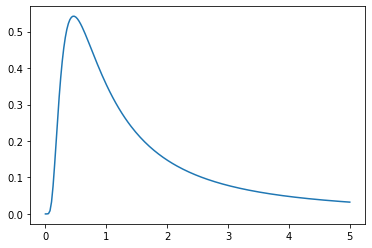

In [102]:
plt.plot(X, stats.f.pdf(X, dfn, dfd))

# References

(scipy.org, 2021)

(Bressert, E, 2013)

(Malhorta,N & Birks,D, 2006)

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html

https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php

https://realpython.com/numpy-scipy-pandas-correlation-python/
    
https://docs.scipy.org/doc/scipy/reference/tutorial/general.html

Numpy & Scipy file:///C:/Users/hogan/Downloads/Eli%20Bressert%20-%20SciPy%20and%20NumPy_%20An%20Overview%20for%20Developers-O'Reilly%20Media%20(2012).pdf